# Corso di Probabilità e Statistica- Matrici Random

Questo capitolo fornisce un esempio di matrice random e mostra come calcolare lo spettro di autovalori.

Notebook adattato da https://github.com/WessZumino/Random-Matrix-theory-for-pedestrians/blob/main/notebooks/wigner_semicircle.ipynb di Marco Miletari.


In [2]:
import numpy as np
from numpy.linalg import eigvalsh
from matplotlib import pyplot as plt


#### Generare una matrice random Gaussiana simmetrica 
Per generare una matrice Gaussiana simmetrica, generiamo prima una matrice gaussiana $X$, calcoliamo la matrice trasposta $X_T$ e
poi calcoliamo la matrice simmetrica come $X_s =(X+X^T)/\sqrt{2}$

In [8]:
#dimensione della matrice
N= 10
sigma = N**(-0.5)

X = rng.normal(scale= sigma, size=(N,N)).astype(np.float32)
Xs= (X+X.T)/2**(0.5)

Controlliamo la simmetria della matrice:

In [11]:
(X==X.T).all()

False

In [12]:
(Xs==Xs.T).all()

True

#### Calcolo degli autovalori
Usiamo numpy.eigvalsh per calcolare gli autovalori

In [13]:
lambdas= eigvalsh(Xs).astype(np.float32)
lambdas


array([-1.1865159 , -0.8798856 , -0.44109142, -0.3302015 , -0.14147323,
        0.31120077,  0.46564874,  0.6407614 ,  1.3067597 ,  1.5505174 ],
      dtype=float32)

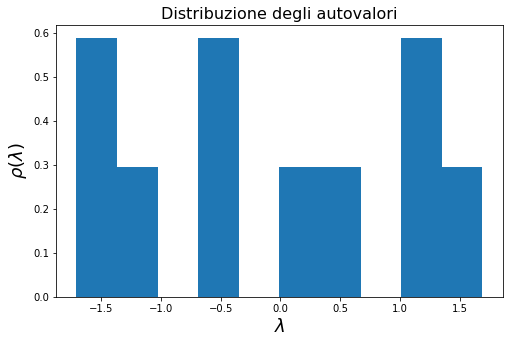

In [25]:
plt.figure(figsize=(8, 5))
plt.hist(lambdas, bins= 10, density = True )
plt.title("Distribuzione degli autovalori", size=16)
plt.xlabel(r"$\lambda$", size= 18)
plt.ylabel(r"$\rho(\lambda)$", size= 18)
plt.show()



Mediamo ora su diverse realizzazioni

In [26]:
Nreal=1000
N=10
sample_lambdas=[]
for i in range(Nreal):
    X = rng.normal(scale= sigma, size=(N,N)).astype(np.float32)
    Xs= (X+X.T)/2**(0.5)
    lambdas= eigvalsh(Xs).astype(np.float32)
    sample_lambdas=np.append(sample_lambdas,lambdas)

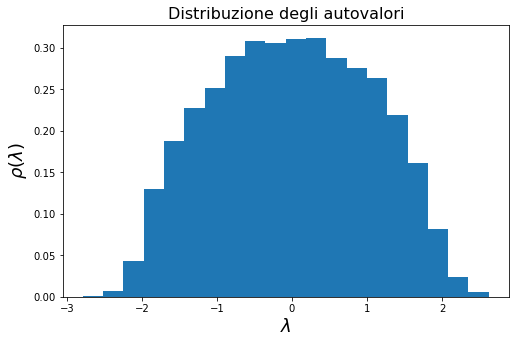

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(sample_lambdas, bins= 20, density = True )
plt.title("Distribuzione degli autovalori", size=16)
plt.xlabel(r"$\lambda$", size= 18)
plt.ylabel(r"$\rho(\lambda)$", size= 18)
plt.show()

#### La legge di Wigner
La legge di Wigner dice che la densità di autovalori per una matrice random Gaussiana è data da:
$$\rho(\lambda)=\frac{1}{2\pi}\sqrt{4-\lambda^2}$$
per $-2 \leq \lambda \leq 2$ e 0 altrimenti.
Controlliamo che la legge descrive i dati definendo la funzione appropriata.

In [43]:
def wigner(x):
    wigner=np.sqrt(4-x**2)/(2*np.pi)
    return wigner

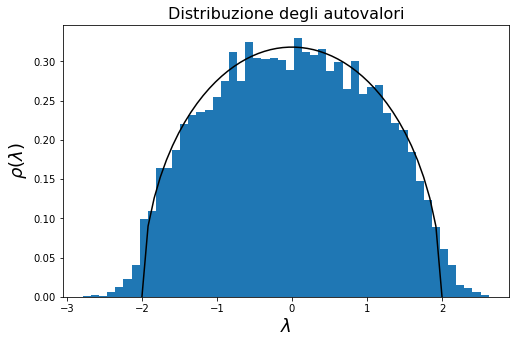

In [46]:
plt.figure(figsize=(8, 5))
nbins=50
x_range=np.linspace(-2,2,nbins)
plt.hist(sample_lambdas, bins= nbins, density = True )
plt.plot(x_range, wigner(x_range), color="black")
plt.title("Distribuzione degli autovalori", size=16)
plt.xlabel(r"$\lambda$", size= 18)
plt.ylabel(r"$\rho(\lambda)$", size= 18)
plt.show()

#### Esercizio 1
Mostrare che le deviazioni dalla legge di Wigner scompariono per N grande.

#### Esercizio 2
Ripetere l'esempio con una matrice di Lévy: una matrice simmetrica random con numeri distribuiti secondo una distribuzione di Lévy simmetrica. Calcolare lo spettro di autovalori.

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html#scipy.stats.levy_stable



#### Esercizio 3

In questo esercizio costruiamo la matrice di covarianza da un set di dati finanziari 
(il prezzo delle azioni SP500, già utilizzato nel capitolo 11) e confrontiamo lo spettro degli autovalori con la teoria delle matrici random.

Procediamo come segue:
- importiamo i dati
- calcoliamo la matrice di covarianza
- calcoliamo lo spettro di autovalori
- confrontiamo il risultato con il risultato di Pastur-Marchenko

$\rho(x) = \frac{\sqrt{(\lambda_{+} -x)(x-\lambda_{-}))}}{2\pi q x}$

con $\lambda_{\pm} = (1\pm \sqrt{q})^2$




In [ ]:
sp500_px = pd.read_csv("../data/sp500_data.csv.gz", index_col=0) # dati di borsa